<a href="https://colab.research.google.com/github/sinaabbasi1/applied-data-science/blob/main/Assignments/Assignment%2009/ADS_Assignment_09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression


## About Dataset

This dataset shows us insurance costs and some of parameters that possibly affect on that

### Columns

age: age of primary beneficiary

sex: insurance contractor gender, female, male

bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

children: Number of children covered by health insurance / Number of dependents

smoker: Smoking

region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

charges: Individual medical costs billed by health insurance

## Loading the dataset and Import Required Libraries

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.ticker import PercentFormatter
import os
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"

In [ ]:
! kaggle datasets download -d mirichoi0218/insurance

  0% 0.00/16.0k [00:00<?, ?B/s]
100% 16.0k/16.0k [00:00<00:00, 9.67MB/s]


In [ ]:
!unzip \*.zip && rm *.zip

Archive:  insurance.zip
  inflating: insurance.csv           


In [ ]:
df = pd.read_csv('insurance.csv')

In [ ]:
df.shape

(1338, 7)

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


## EDA

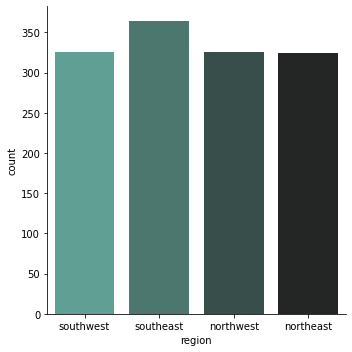

In [ ]:
sns.catplot(x='region', kind='count', palette="dark:#5A9_r", data=df)
plt.show()

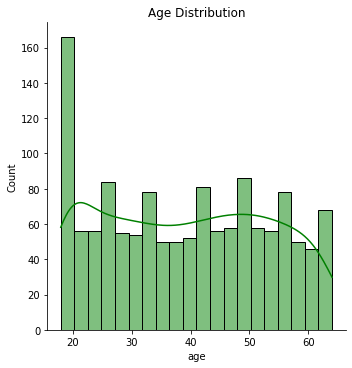

In [ ]:
sns.displot((df['age']), kde = True, bins=20, color='g')
plt.title('Age Distribution')
plt.show()

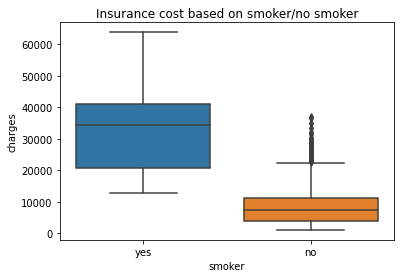

In [ ]:
sns.boxplot(x='smoker', y='charges', data=df)
plt.title('Insurance cost based on smoker/no smoker')
plt.show()

There is a non surprising result that shows us, there is major difference between smokers and non smokers in insurance cost

In [ ]:
df = pd.get_dummies(df)
df['overweight'] = (df.bmi >= 30).astype(int)
df['unhealthy'] = df.smoker_yes * df.overweight

In [ ]:
df.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,overweight,unhealthy
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1,0,0
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0,0,0


Here we consider people who have more than 30 bmi as an "Overweight" person

Plus we make another column that shows a person is kind of "Unhealthy" or not. If a person was smoker and his bmi was more than 30, we identify him as "Unhealthy"

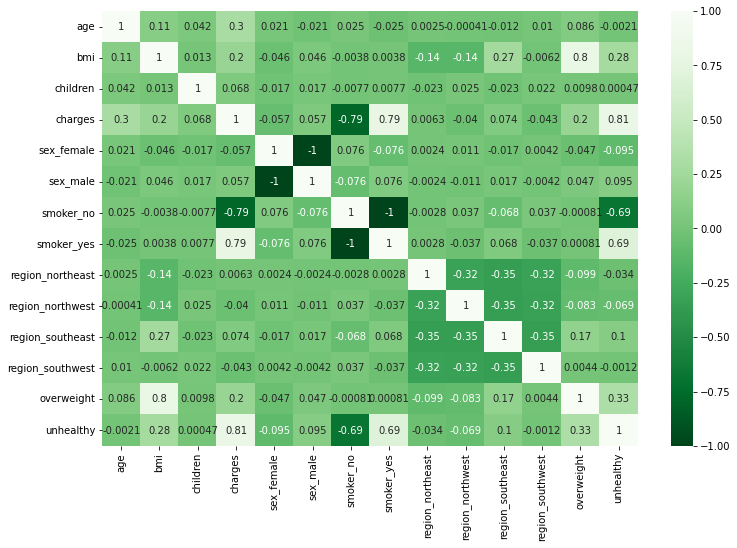

In [ ]:
plt.figure(figsize=(12, 8))

sns.heatmap(df.corr(), cmap='Greens_r', annot=True)
plt.show()

As it is clear, the column "Unhealthy" has the highest correlation with the a amount of insurance cost, followed by th column that shows whether a person is a smoker or not

**Split the target column :**

In [ ]:
target = df.pop('charges')

In [ ]:
from sklearn.feature_selection import SelectKBest, mutual_info_regression
feature_selector = SelectKBest(score_func=mutual_info_regression, k = 'all').fit(df, target)

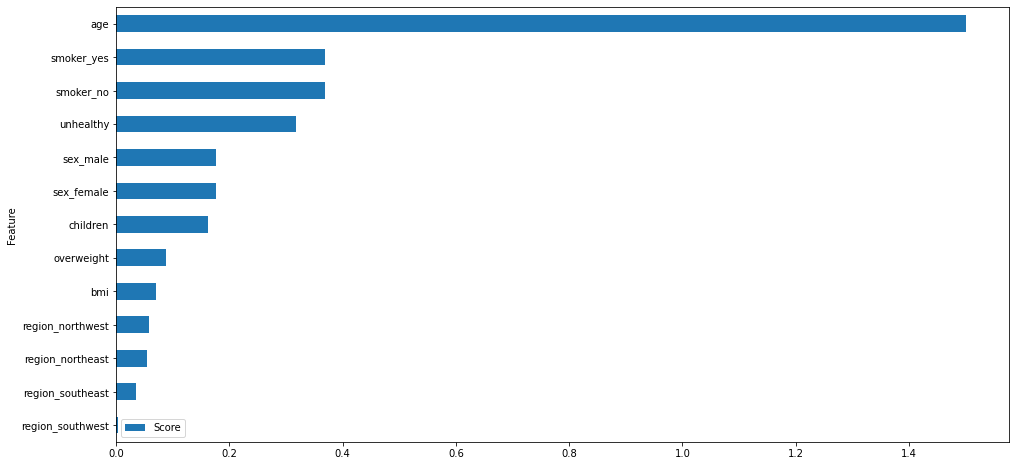

In [ ]:
feature_scores = pd.DataFrame({'Feature':df.columns,'Score':feature_selector.scores_})
feature_scores.sort_values(by=['Score'],inplace=True)

feature_scores[0:20].plot(x='Feature',y='Score',kind='barh',figsize=(16,8))
plt.show()

The "Age" parameter has the highest mutual infomation with insurance cost by a significant margin compaired to the other variables.

After that, there are "Smoker_yes"-"Smoker_no" and "Unhealthy" columns

In [ ]:
df.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,overweight,unhealthy
0,19,27.900,0,1,0,0,1,0,0,0,1,0,0
1,18,33.770,1,0,1,1,0,0,0,1,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0,0,0


Before doing anything, we have to normalize our column values in term of deleting the importance of the scale of columns

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
normalized_data = scaler.fit_transform(df)

**Split data into train and test set**

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(normalized_data, target, test_size=0.2, random_state=0)

In [ ]:
from sklearn.neural_network import MLPRegressor
model = MLPRegressor(hidden_layer_sizes=(128, 128, 64, 32),max_iter=500)
model.fit(x_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=(128, 128, 64, 32), max_iter=500)

In [ ]:
predictions = model.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, predictions)
print('R2 Score is : %.2f'%(r2))

R2 Score is : 0.89


In [ ]:
from keras import models, layers

In [ ]:
model = models.Sequential()

In [ ]:
#     Add four hidden layer, as it mentioned in excercise
model.add(layers.Dense(units=128, activation='relu', input_shape=(x_train.shape[1], )))
model.add(layers.Dense(units=128, activation='relu'))
model.add(layers.Dense(units=64, activation='relu'))
model.add(layers.Dense(units=32, activation='relu'))

#     Add an output layer
model.add(layers.Dense(units=1))

In [ ]:
model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['mse'])

In [ ]:
model.fit(x_train, y_train, batch_size=100, epochs=20)

Epoch 1/20
11/11 [==============================] - 3s 3ms/step - loss: 317529440.0000 - mse: 317529440.0000
Epoch 2/20
11/11 [==============================] - 0s 3ms/step - loss: 316675168.0000 - mse: 316675168.0000
Epoch 3/20
11/11 [==============================] - 0s 3ms/step - loss: 313769920.0000 - mse: 313769920.0000
Epoch 4/20
11/11 [==============================] - 0s 3ms/step - loss: 307583584.0000 - mse: 307583584.0000
Epoch 5/20
11/11 [==============================] - 0s 3ms/step - loss: 296411808.0000 - mse: 296411808.0000
Epoch 6/20
11/11 [==============================] - 0s 4ms/step - loss: 278148768.0000 - mse: 278148768.0000
Epoch 7/20
11/11 [==============================] - 0s 3ms/step - loss: 252249344.0000 - mse: 252249344.0000
Epoch 8/20
11/11 [==============================] - 0s 3ms/step - loss: 218970240.0000 - mse: 218970240.0000
Epoch 9/20
11/11 [==============================] - 0s 3ms/step - loss: 178996560.0000 - mse: 178996560.0000
Epoch 10/20
11/11 [

In [ ]:
prediction = model.predict(x_test)

9/9 [==============================] - 0s 2ms/step


In [ ]:
r2 = r2_score(y_test, prediction)
print('R2 Score is : %.2f'%(r2))

R2 Score is : 0.89


In [ ]:
input_layer = layers.Input(shape=(x_train.shape[1],))

# Pass the output of the input layer into a hidden layer
hidden_layer_1 = layers.Dense(128, activation='relu')(input_layer)

# The second hidden layer receives input from the input_layer and not the last hidden layer
hidden_layer_2 = layers.Dense(64, activation='relu')(input_layer)

# The second hidden layer receives input from the hidden_layer_1
hidden_layer_3 = layers.Dense(64, activation='relu')(hidden_layer_2)

# The last layer is a combination of last three hidden layer
hidden_layer_4 = layers.Concatenate()([hidden_layer_2, hidden_layer_3])

# Finally, output layer gets it's input from from the last hidden layer
output_layer = layers.Dense(1)(hidden_layer_4)

model = models.Model(inputs=input_layer, outputs=output_layer)

### Visualize model

In addition to viewing the summary of the model, we can visualize the structure as well!

In [ ]:
from tensorflow.keras.utils import plot_model

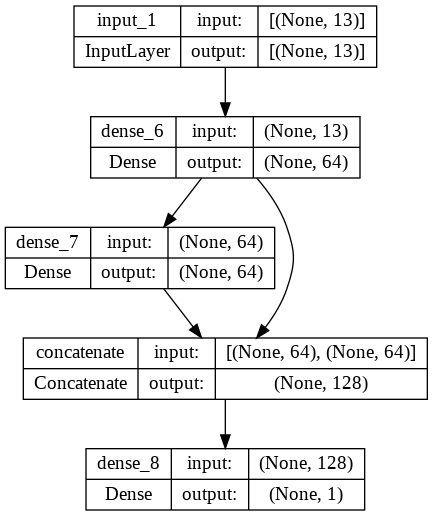

In [ ]:
plot_model(model, show_shapes=True)

In [ ]:
model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['mse'])

In [ ]:
model.fit(x_train, y_train, batch_size=32, epochs=250)

Epoch 1/250
34/34 [==============================] - 1s 4ms/step - loss: 317570080.0000 - mse: 317570080.0000
Epoch 2/250
34/34 [==============================] - 0s 3ms/step - loss: 317371680.0000 - mse: 317371680.0000
Epoch 3/250
34/34 [==============================] - 0s 3ms/step - loss: 317034880.0000 - mse: 317034880.0000
Epoch 4/250
34/34 [==============================] - 0s 4ms/step - loss: 316482080.0000 - mse: 316482080.0000
Epoch 5/250
34/34 [==============================] - 0s 3ms/step - loss: 315673696.0000 - mse: 315673696.0000
Epoch 6/250
34/34 [==============================] - 0s 4ms/step - loss: 314616992.0000 - mse: 314616992.0000
Epoch 7/250
34/34 [==============================] - 0s 3ms/step - loss: 313211552.0000 - mse: 313211552.0000
Epoch 8/250
34/34 [==============================] - 0s 3ms/step - loss: 311479936.0000 - mse: 311479936.0000
Epoch 9/250
34/34 [==============================] - 0s 3ms/step - loss: 309290944.0000 - mse: 309290944.0000
Epoch 10/2

In [ ]:
prediction = model.predict(x_test)

9/9 [==============================] - 0s 2ms/step


In [ ]:
r2 = r2_score(y_test, prediction)
print('R2 Score is : %.2f'%(r2))

R2 Score is : 0.90


In [ ]:
# Importing the necessary libraries
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader
from torch import Tensor

In [ ]:
# transform to torch tensor
tensor_x_train = Tensor(x_train)
tensor_y_train = Tensor(y_train.values.astype(np.float32))
tensor_x_test = Tensor(x_test)
tensor_y_test = Tensor(y_test.values.astype(np.float32))

# create the datset
train_set = TensorDataset(tensor_x_train,tensor_y_train)
test_set = TensorDataset(tensor_x_test,tensor_y_test)

# create your dataloader
train_dl = DataLoader(train_set,batch_size=32, shuffle=True)
test_dl = DataLoader(test_set,batch_size=32, shuffle=True)


In [ ]:
layers = []
layers.append(nn.Linear(x_train.shape[1], 128))
layers.append(nn.ReLU())

layers.append(nn.Linear(128, 64))
layers.append(nn.ReLU())

layers.append(nn.Linear(64, 32))
layers.append(nn.ReLU())

layers.append(nn.Linear(32, 1))
layers.append(nn.ReLU())

model = nn.Sequential(*layers)

In [ ]:
from torch.nn import MSELoss
from torch.optim import Adam

criterion = MSELoss()
optimizer = Adam(model.parameters(), lr=0.0001)

Now let's perform the training.

In contrast to Keras, we need to create our own training loop, which is a bit cumbersome!

In [ ]:
# loop over the dataset multiple times
for epoch in range(100):

    running_loss = 0.0
    for i, (inputs, targets) in enumerate(train_dl):

        # clear the gradients
        optimizer.zero_grad()
        # compute the model output
        yhat = model(inputs)
        # calculate loss
        loss = criterion(yhat.ravel(), targets)

        # credit assignment
        loss.backward()
        # update model weights
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if not i % 5000:    # print every 2000 mini-batches
            print('[%d, %5d] MSE is: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

[1,     1] MSE is: 193475.744
[2,     1] MSE is: 153438.544
[3,     1] MSE is: 228429.008
[4,     1] MSE is: 158714.752
[5,     1] MSE is: 124841.872
[6,     1] MSE is: 136486.064
[7,     1] MSE is: 211465.408
[8,     1] MSE is: 125603.080
[9,     1] MSE is: 162660.896
[10,     1] MSE is: 123342.968
[11,     1] MSE is: 112719.600
[12,     1] MSE is: 159192.096
[13,     1] MSE is: 67498.040
[14,     1] MSE is: 206958.592
[15,     1] MSE is: 208784.208
[16,     1] MSE is: 162307.344
[17,     1] MSE is: 102699.984
[18,     1] MSE is: 159931.552
[19,     1] MSE is: 192897.408
[20,     1] MSE is: 110483.064
[21,     1] MSE is: 131433.064
[22,     1] MSE is: 263902.400
[23,     1] MSE is: 168476.112
[24,     1] MSE is: 118802.272
[25,     1] MSE is: 70755.488
[26,     1] MSE is: 170702.864
[27,     1] MSE is: 119106.544
[28,     1] MSE is: 123627.056
[29,     1] MSE is: 157464.832
[30,     1] MSE is: 134192.328
[31,     1] MSE is: 137363.808
[32,     1] MSE is: 127220.520
[33,     1] MSE is: